In [7]:
# Adding the imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
# Load the dataset
df = pd.read_csv('/Users/berekettadesse/3162/Global Electricity Statistics.csv')
df.head()

,Country,Features,Region,1980,1981,1982,1983,1984,1985,1986,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,Algeria,net generation,Africa,6.683,7.65,8.824,9.615,10.537,11.569,12.214,...,53.9845,56.3134,60.39972,64.68244,66.75504,71.49546,72.10903,76.685,72.73591277,77.53072719
1,Angola,net generation,Africa,0.905,0.906,0.995,1.028,1.028,1.028,1.088,...,6.03408,7.97606,9.21666,9.30914,10.203511,10.67604,12.83194,15.4,16.6,16.429392
2,Benin,net generation,Africa,0.005,0.005,0.005,0.005,0.005,0.005,0.005,...,0.04612,0.08848,0.22666,0.31056,0.26004,0.3115,0.19028,0.2017,0.22608,0.24109728
3,Botswana,net generation,Africa,0.443,0.502,0.489,0.434,0.445,0.456,0.538,...,0.33,0.86868,2.17628,2.79104,2.52984,2.8438,2.97076,3.0469,2.05144,2.18234816
4,Burkina Faso,net generation,Africa,0.098,0.108,0.115,0.117,0.113,0.115,0.122,...,0.86834,0.98268,1.11808,1.43986,1.5509,1.64602,1.6464,1.72552,1.647133174,1.761209666


Pre-Processing the data

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1610 entries, 0 to 1609
Data columns (total 45 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Country   1610 non-null   object
 1   Features  1610 non-null   object
 2   Region    1610 non-null   object
 3   1980      1582 non-null   object
 4   1981      1582 non-null   object
 5   1982      1582 non-null   object
 6   1983      1582 non-null   object
 7   1984      1582 non-null   object
 8   1985      1582 non-null   object
 9   1986      1582 non-null   object
 10  1987      1582 non-null   object
 11  1988      1582 non-null   object
 12  1989      1582 non-null   object
 13  1990      1582 non-null   object
 14  1991      1582 non-null   object
 15  1992      1582 non-null   object
 16  1993      1582 non-null   object
 17  1994      1582 non-null   object
 18  1995      1582 non-null   object
 19  1996      1582 non-null   object
 20  1997      1582 non-null   object
 21  1998      1582

In [ ]:
# Filter the dataframe for 'net generation' and 'net consumption' features
selected_features = ['net generation', 'net consumption']
df_filtered = df[df['Features'].isin(selected_features)]

In [96]:
# Identify all unique non-numeric values in the dataset
non_numeric_values = {}
for column in df_filtered.columns[3:]:
    non_numeric_values[column] = df_filtered[column].apply(lambda x: x if not str(x).replace('.', '').isdigit() else None).unique()

# Replace non-numeric values with NaN using .loc
for column in df_filtered.columns[3:]:
    df_filtered.loc[:, column] = df_filtered[column].replace(non_numeric_values[column], np.nan).astype(float)

# Alternatively, you can use .applymap to apply the conversion to the entire DataFrame
# df_filtered.iloc[:, 3:] = df_filtered.iloc[:, 3:].applymap(lambda x: x if not str(x).replace('.', '').isdigit() else None).astype(float)


In [11]:
# Replace '--' with NaN to handle non-numeric values
df.replace('--', np.nan, inplace=True)

In [97]:

# Calculate the mean for each 10-year range
column_ranges = {
    'avg 1980-1989': [str(year) for year in range(1980, 1990)],
    'avg 1990-1999': [str(year) for year in range(1990, 2000)],
    'avg 2000-2009': [str(year) for year in range(2000, 2010)],
    'avg 2010-2019': [str(year) for year in range(2010, 2020)],
    'avg 2020-2021': [str(year) for year in range(2020, 2021)]
}

# Use .loc to avoid SettingWithCopyWarning
for new_col, columns in column_ranges.items():
    df_filtered.loc[:, new_col] = df_filtered[columns].mean(axis=1)


In [14]:
# Keep only the necessary columns
final_df = df_filtered[['Country', 'Features', 'Region', 'avg 1980-1989', 'avg 1990-1999', 'avg 2000-2009', 'avg 2010-2019', 'avg 2020-2021']]
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

# Display the head of the final dataframe
final_df.head()

,Country,Features,Region,avg 1980-1989,avg 1990-1999,avg 2000-2009,avg 2010-2019,avg 2020-2021
0,Algeria,net generation,Africa,10.8635,18.73160,30.615694,61.359887,72.735913
1,Angola,net generation,Africa,1.0276,1.31670,2.662382,9.248803,16.600000
2,Benin,net generation,Africa,0.0050,0.03928,0.113354,0.183944,0.226080
3,Botswana,net generation,Africa,0.5750,0.96350,0.721014,1.850670,2.051440
4,Burkina Faso,net generation,Africa,0.1217,0.23940,0.477078,1.230558,1.647133


Before we get to the visualizations, here is what the Processed data looks like

In [15]:
final_df

,Country,Features,Region,avg 1980-1989,avg 1990-1999,avg 2000-2009,avg 2010-2019,avg 2020-2021
0,Algeria,net generation,Africa,10.863500,18.731600,30.615694,61.359887,72.735913
1,Angola,net generation,Africa,1.027600,1.316700,2.662382,9.248803,16.600000
2,Benin,net generation,Africa,0.005000,0.039280,0.113354,0.183944,0.226080
3,Botswana,net generation,Africa,0.575000,0.963500,0.721014,1.850670,2.051440
4,Burkina Faso,net generation,Africa,0.121700,0.239400,0.477078,1.230558,1.647133
5,Burundi,net generation,Africa,0.048800,0.112100,0.108200,0.207472,0.350521
6,Cabo Verde,net generation,Africa,0.025100,0.074200,0.211900,0.402829,0.433796
7,Cameroon,net generation,Africa,2.205100,2.882500,4.234740,6.864880,8.297891
8,Central African Republic,net generation,Africa,0.078800,0.098400,0.137700,0.160574,0.151000
9,Chad,net generation,Africa,0.058600,0.083300,0.118100,0.264064,0.294781


Visualizations 

In [38]:
# Filter the dataset for total net generation and consumption
net_gen = final_df[final_df['Features'] == 'net generation'].copy()
net_cons = final_df[final_df['Features'] == 'net consumption'].copy()

# Extract the columns with the average values
avg_columns = ['avg 1980-1989', 'avg 1990-1999', 'avg 2000-2009', 'avg 2010-2019', 'avg 2020-2021']

# Calculate global net generation and consumption per year
global_net_gen = net_gen[avg_columns].sum(axis=0)
global_net_cons = net_cons[avg_columns].sum(axis=0)

# Print the global net generation and consumption values
print("Global Net Generation:")
for time_period, value in global_net_gen.items():
    print(f"{time_period}: {value:.2f} TWh")

print("\nGlobal Net Consumption:")
for time_period, value in global_net_cons.items():
    print(f"{time_period}: {value:.2f} TWh")


Global Net Generation:
avg 1980-1989: 9284.90 TWh
avg 1990-1999: 14751.53 TWh
avg 2000-2009: 17057.14 TWh
avg 2010-2019: 23218.65 TWh
avg 2020-2021: 25884.19 TWh

Global Net Consumption:
avg 1980-1989: 8519.96 TWh
avg 1990-1999: 13461.73 TWh
avg 2000-2009: 15505.29 TWh
avg 2010-2019: 21329.80 TWh
avg 2020-2021: 23965.64 TWh


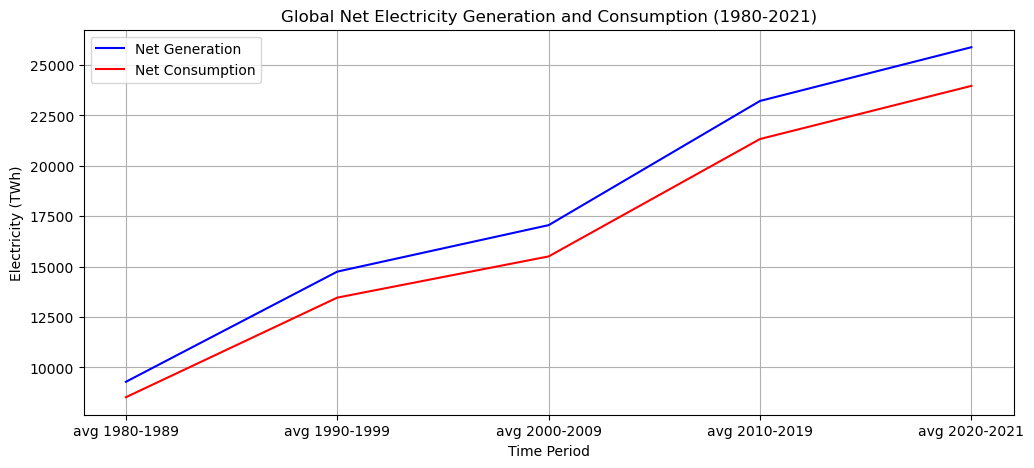

In [43]:
from itertools import cycle
from matplotlib.ticker import MaxNLocator

# Set up the color cycle for pie chart
color_cycle = cycle(plt.cm.tab20.colors)

# Filter the dataset for total net generation and consumption
net_gen = final_df[final_df['Features'] == 'net generation'].copy()
net_cons = final_df[final_df['Features'] == 'net consumption'].copy()

# Extract the columns with the average values
avg_columns = ['avg 1980-1989', 'avg 1990-1999', 'avg 2000-2009', 'avg 2010-2019', 'avg 2020-2021']

# Calculate global net generation and consumption per year
global_net_gen = net_gen[avg_columns].sum(axis=0)
global_net_cons = net_cons[avg_columns].sum(axis=0)

# Plot global net generation and consumption over the average time periods
plt.figure(figsize=(12, 5))

plt.plot(avg_columns, global_net_gen.values, label='Net Generation', color='blue')
plt.plot(avg_columns, global_net_cons.values, label='Net Consumption', color='red')

plt.title('Global Net Electricity Generation and Consumption (1980-2021)')
plt.xlabel('Time Period')
plt.ylabel('Electricity (TWh)')
plt.legend()
plt.grid(True)
plt.show()




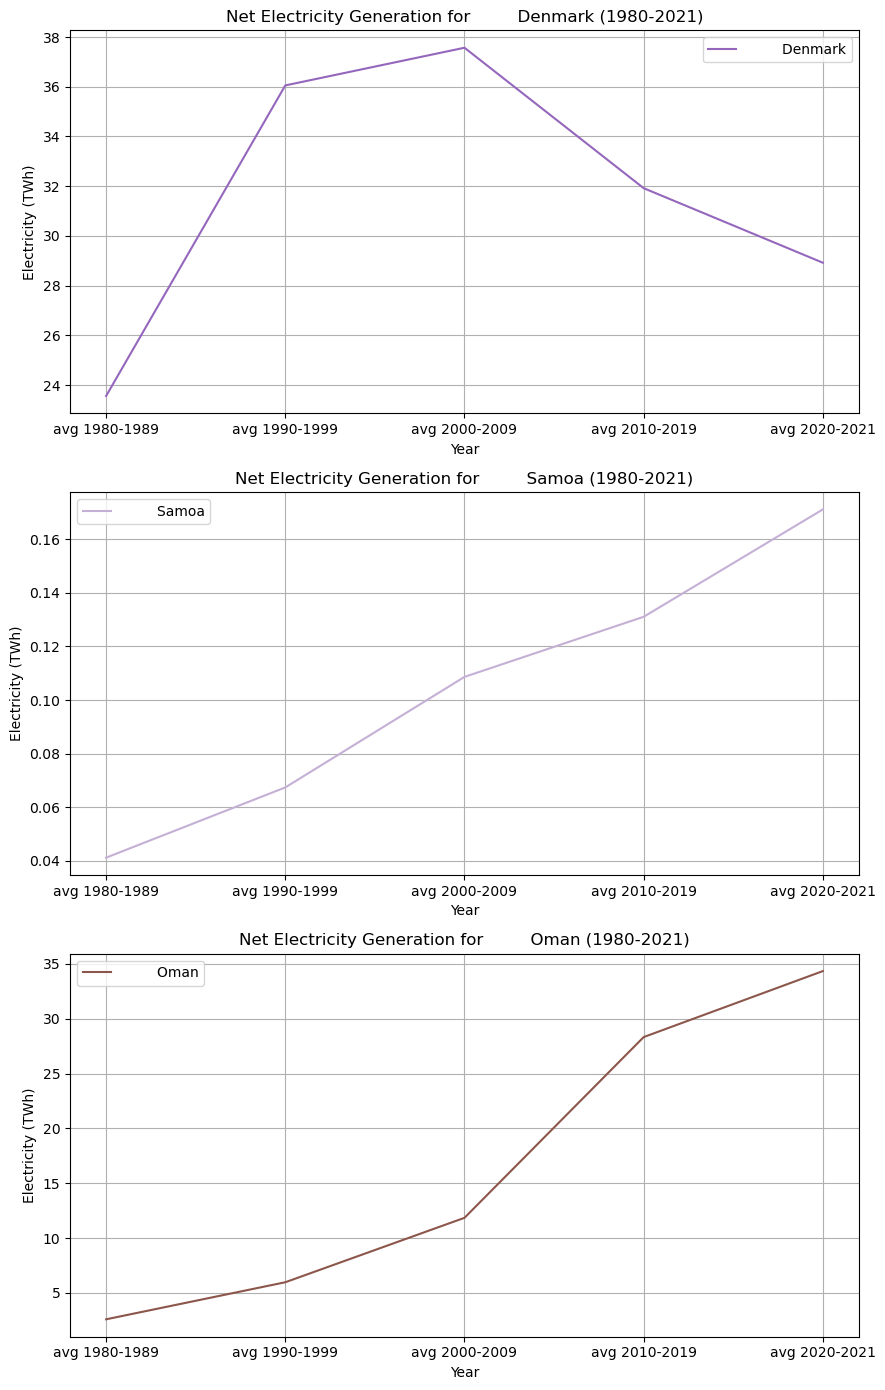

In [99]:
# Select 3 random countries
random_countries = net_gen['Country'].sample(3, random_state=1)

# Plot net generation for 3 random countries
fig, axes = plt.subplots(3, 1, figsize=(9, 14))

for i, country in enumerate(random_countries):
    country_data = net_gen[net_gen['Country'] == country].iloc[:, 3:].T
    country_data.columns = ['Net Generation']
    axes[i].plot(country_data.index, country_data.values, label=country, color=next(color_cycle))
    axes[i].set_title('Net Electricity Generation for ' + country + ' (1980-2021)')
    axes[i].set_xlabel('Year')
    axes[i].set_ylabel('Electricity (TWh)')
    axes[i].legend()
    axes[i].grid(True)
    axes[i].xaxis.set_major_locator(MaxNLocator(integer=True))

plt.tight_layout()
plt.show()


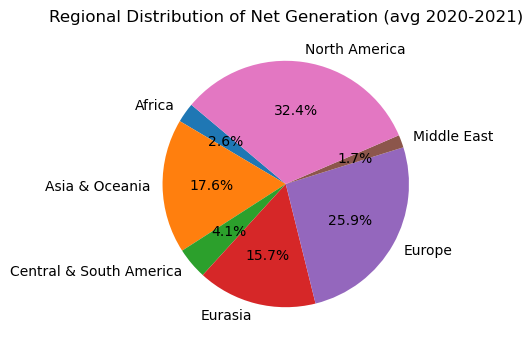

In [122]:
year_to_visualize = 'avg 2020-2021'  # Choose the desired year or year range
region_net_generation = final_df.groupby('Region')[year_to_visualize].sum()

plt.figure(figsize=(4, 4))
plt.pie(region_net_generation, labels=region_net_generation.index, autopct='%1.1f%%', startangle=140)
plt.title(f'Regional Distribution of Net Generation ({year_to_visualize})')
plt.show()

In [123]:
import pandas as pd

# Assuming df is your DataFrame

# Convert '2021' column to numeric, coercing any errors
df['2021'] = pd.to_numeric(df['2021'], errors='coerce')

# Create a copy of the subset DataFrame
df_net_consumption = df[df['Features'] == 'net consumption'].copy()

# Then sort by the year 2021 and get the top 10
top_10_net_consumption_2021 = df_net_consumption.nlargest(10, '2021')

# Display the top 10 countries
print(top_10_net_consumption_2021[['Country', '2021']].reset_index(drop=True))


                 Country         2021
0                  China  7805.656341
1          United States  3979.279761
2                  India  1442.750051
3                 Russia   996.442916
4                  Japan   913.078150
5                 Brazil   577.295357
6            South Korea   567.672433
7                 Canada   554.744387
8                Germany   511.660388
9                 France   447.447054


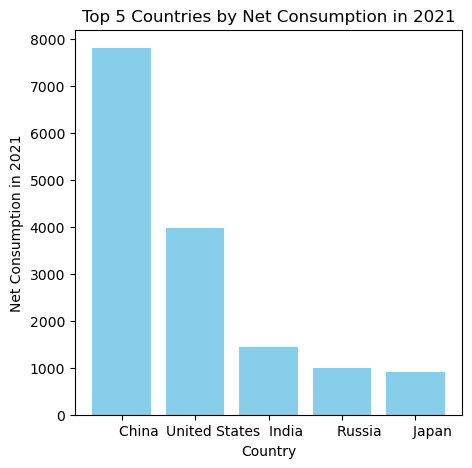

In [113]:

# Assuming df is your DataFrame

# Convert '2021' column to numeric, coercing any errors
df['2021'] = pd.to_numeric(df['2021'], errors='coerce')

# Create a copy of the subset DataFrame
df_net_consumption = df[df['Features'] == 'net consumption'].copy()

# Then sort by the year 2021 and get the top 5
top_5_net_consumption_2021 = df_net_consumption.nlargest(5, '2021')

# Plotting a bar chart
plt.figure(figsize=(5, 5))
plt.bar(top_5_net_consumption_2021['Country'], top_5_net_consumption_2021['2021'], color='skyblue')
plt.xlabel('Country')
plt.ylabel('Net Consumption in 2021')
plt.title('Top 5 Countries by Net Consumption in 2021')
plt.show()


In [91]:
import pandas as pd

# Assuming df is your DataFrame

# Convert '2021' column to numeric, coercing any errors
df['2021'] = pd.to_numeric(df['2021'], errors='coerce')

# Create a copy of the subset DataFrame
df_net_consumption = df[df['Features'] == 'net consumption'].copy()

# Exclude rows with '0' values in the '2021' column
df_net_consumption = df_net_consumption[df_net_consumption['2021'] != 0]

# Then get the least 10 countries based on the year 2021
least_10_net_consumption_2021 = df_net_consumption.nsmallest(10, '2021')

# Display the least 10 countries
print(least_10_net_consumption_2021[['Country', '2021']].reset_index(drop=True))


                             Country      2021
0                               Niue  0.003308
1                       Saint Helena  0.007244
2                         Montserrat  0.014481
3                   Falkland Islands  0.019132
4                           Kiribati  0.029078
5                              Nauru  0.037426
6                       Cook Islands  0.039460
7          Saint Pierre and Miquelon  0.053199
8                            Vanuatu  0.065950
9                              Tonga  0.072026


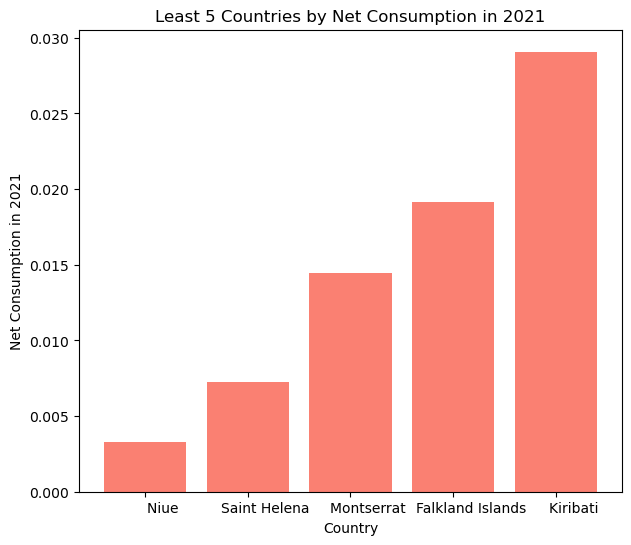

In [116]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df is your DataFrame

# Convert '2021' column to numeric, coercing any errors
df['2021'] = pd.to_numeric(df['2021'], errors='coerce')

# Create a copy of the subset DataFrame
df_net_consumption = df[df['Features'] == 'net consumption'].copy()

# Exclude rows with '0' values in the '2021' column
df_net_consumption = df_net_consumption[df_net_consumption['2021'] != 0]

# Then get the least 5 countries based on the year 2021
least_5_net_consumption_2021 = df_net_consumption.nsmallest(5, '2021')

# Plotting a bar chart for the least 5 countries
plt.figure(figsize=(7, 6))
plt.bar(least_5_net_consumption_2021['Country'], least_5_net_consumption_2021['2021'], color='salmon')
plt.xlabel('Country')
plt.ylabel('Net Consumption in 2021')
plt.title('Least 5 Countries by Net Consumption in 2021')
plt.show()
